Let's load up our data. We need to do a little feature engineering because our dates are stored in a format that pandas won't just parse.

In [1]:
import pandas as pd

DATA = '/kaggle/input/salesforce-crm-stock-data-2004-to-december-2024/Salesforce (CRM) From 2004 To Dec-2024.csv'

df = pd.read_csv(filepath_or_buffer=DATA)
df['Date'] = df['Date'].apply(func=lambda x: x.split(' ')[0])
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['dollars'] = 0.5 * df['Volume'] * (df['Low'] + df['High'])
df.head()

,Date,Open,High,Low,Close,Volume,year,dollars
0,2004-06-23,3.733426,4.305884,3.671202,4.280995,43574400,2004,1.737984e+08
1,2004-06-24,4.368108,4.402954,4.106768,4.171481,8887200,2004,3.781380e+07
2,2004-06-25,4.109258,4.168993,3.930053,3.932542,6710000,2004,2.717230e+07
3,2004-06-28,3.982321,4.034589,3.842940,3.982321,2270800,2004,8.944146e+06
4,2004-06-29,3.982321,4.156548,3.940009,4.081879,2112000,2004,8.549964e+06


Let's look at our correlations. We expect our price correlations to be nearly but not equal to 1.0; we don't have an expectation as to what the correlation between prices and volume will be.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999870,0.999846,0.999703,-0.092836
High,0.999870,1.000000,0.999808,0.999858,-0.089368
Low,0.999846,0.999808,1.000000,0.999864,-0.096819
Close,0.999703,0.999858,0.999864,1.000000,-0.093015
Volume,-0.092836,-0.089368,-0.096819,-0.093015,1.000000


Let's first just look at the price time series.

<Axes: xlabel='Date', ylabel='Close'>

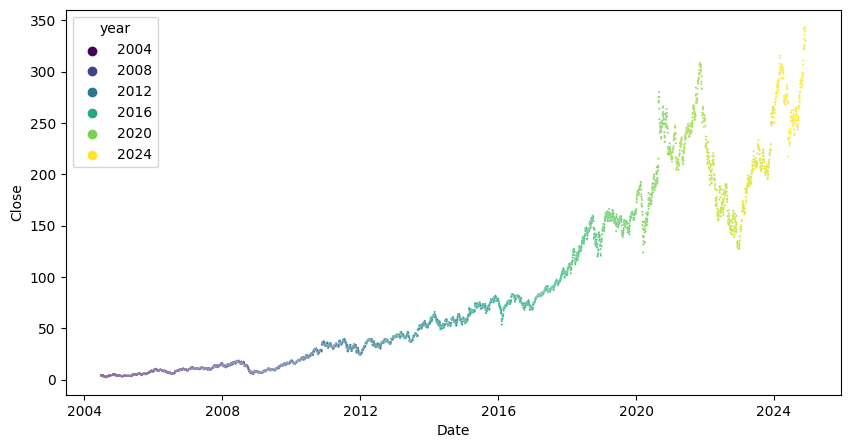

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', s=2, hue='year', palette='viridis')

What do we see? We see a lot of price volatility over the last four years, and overall we see a lot of price appreciation: something like 100x over the course of the period of interest. Let's make a log plot in the price direction to see if we see the same kind of volatility over the course of the whole series.

<Axes: xlabel='Date', ylabel='Close'>

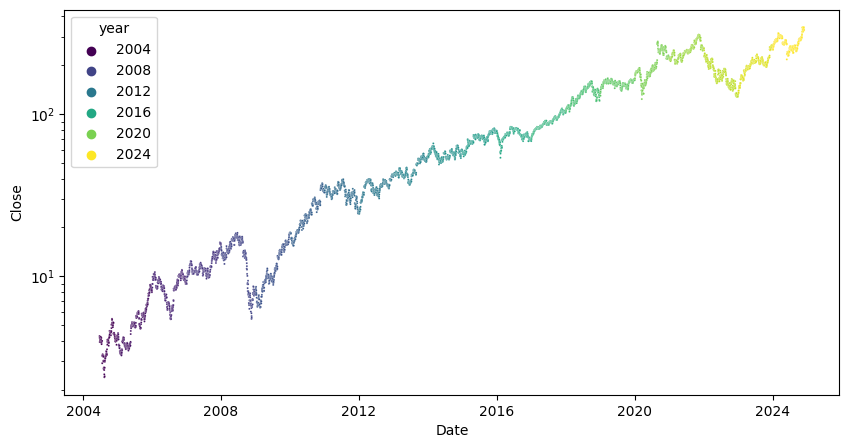

In [4]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Close', s=2, hue='year', palette='viridis')

What do we see? We see gradual appreciation over time with occasional large reversals.

We already saw that the daily price and daily volatility are essentially uncorrelated. What does that look like?

<Axes: xlabel='Close', ylabel='Volume'>

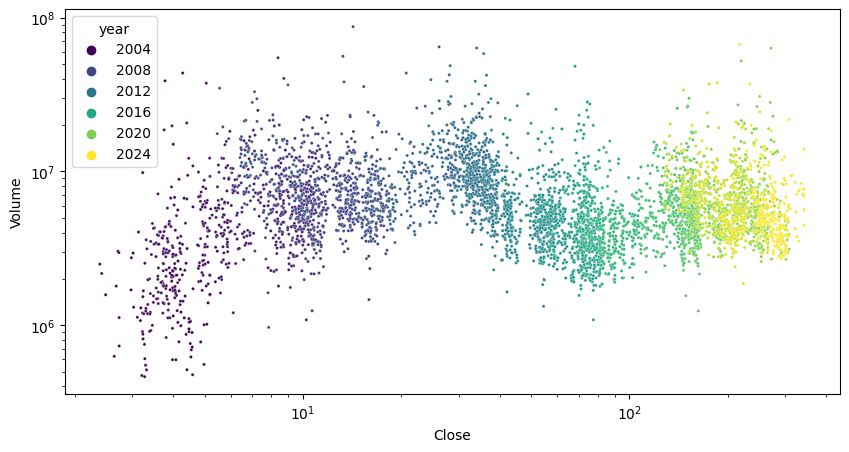

In [5]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, y='Volume', x='Close', s=5, hue='year', palette='viridis')

It really looks like the log of the volume is a function of the log of the price, with two or maybe three regimes.

Let's look at the daily dollar volume as a function of time.

<Axes: xlabel='Date', ylabel='dollars'>

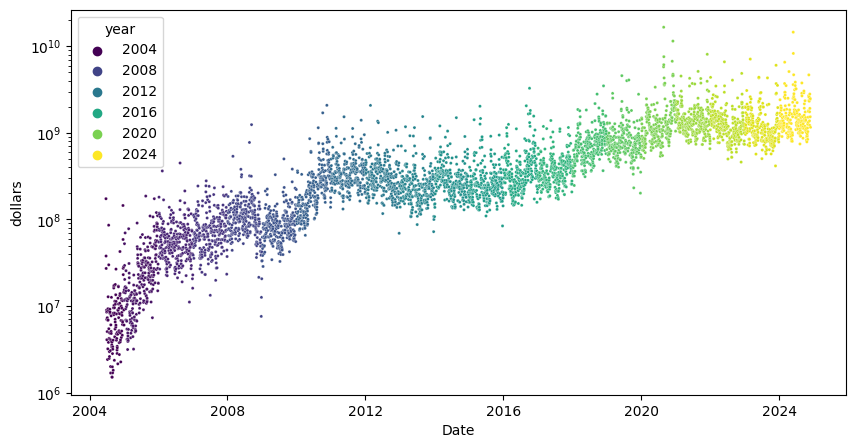

In [6]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', s=5, hue='year', palette='viridis')

Interestingly we see that the log of the daily dollar volume gradually increases over time on average. This is a little surprising, as rising prices tend to have a downward pressure on volume.